<a href="https://colab.research.google.com/github/johnsonadam187/scikit_ml_projects/blob/main/SVM_on_Heart_disease_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Retrieve the data already saved on google drive

In [2]:
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/"ML Datasets"/"UCI datasets"
df1 = pd.read_csv(r"/content/gdrive/MyDrive/ML Datasets/UCI datasets/Heart disease/processed.cleveland.data", header=None)
df1.columns = ["age", "sex", "chest_pain", "resting_blood_pressure", 
               "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic_results", 
               "maximum_HR_achieved", "exercise_induced_angina", "ST_depression_by_exercise", 
               "slope_of_ST_exercise_peak", "major_vessels_coloured_by_fluoro", 
               "thallium_heart_scan", "diagnosis_of_heart_disease"]
df1.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML Datasets/UCI datasets


,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_HR_achieved,exercise_induced_angina,ST_depression_by_exercise,slope_of_ST_exercise_peak,major_vessels_coloured_by_fluoro,thallium_heart_scan,diagnosis_of_heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Transform and encode the data correctly

In [3]:
df1.dtypes

age                                     float64
sex                                     float64
chest_pain                              float64
resting_blood_pressure                  float64
cholesterol                             float64
fasting_blood_sugar                     float64
resting_electrocardiographic_results    float64
maximum_HR_achieved                     float64
exercise_induced_angina                 float64
ST_depression_by_exercise               float64
slope_of_ST_exercise_peak               float64
major_vessels_coloured_by_fluoro         object
thallium_heart_scan                      object
diagnosis_of_heart_disease                int64
dtype: object

In [4]:
for index, item in enumerate(df1.columns):
  print(f"{item}: {len(df1.iloc[:, index].value_counts())}")

age: 41
sex: 2
chest_pain: 4
resting_blood_pressure: 50
cholesterol: 152
fasting_blood_sugar: 2
resting_electrocardiographic_results: 3
maximum_HR_achieved: 91
exercise_induced_angina: 2
ST_depression_by_exercise: 40
slope_of_ST_exercise_peak: 3
major_vessels_coloured_by_fluoro: 5
thallium_heart_scan: 4
diagnosis_of_heart_disease: 5


In [5]:
thal_med = np.median([float(item) for item in df1['thallium_heart_scan'] if not item == "?"])
df1["thallium_heart_scan"].replace("?", thal_med, inplace=True)
df1['major_vessels_coloured_by_fluoro'].replace("?", 0.0, inplace=True)
df1 = df1.astype({"thallium_heart_scan":'float64', "major_vessels_coloured_by_fluoro":"float64"})
target = df1.pop("diagnosis_of_heart_disease")
df2 = pd.get_dummies(data=df1, columns=['chest_pain', "resting_electrocardiographic_results", "slope_of_ST_exercise_peak", "major_vessels_coloured_by_fluoro", "thallium_heart_scan"])
df2 = df2.astype({'age':'int', 'sex':'int', 'fasting_blood_sugar':'int', 'exercise_induced_angina':'int'})
indices = target > 1
target[indices] = 1

check the data

In [6]:
df2.head(2)

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,maximum_HR_achieved,exercise_induced_angina,ST_depression_by_exercise,chest_pain_1.0,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0,resting_electrocardiographic_results_0.0,resting_electrocardiographic_results_1.0,resting_electrocardiographic_results_2.0,slope_of_ST_exercise_peak_1.0,slope_of_ST_exercise_peak_2.0,slope_of_ST_exercise_peak_3.0,major_vessels_coloured_by_fluoro_0.0,major_vessels_coloured_by_fluoro_1.0,major_vessels_coloured_by_fluoro_2.0,major_vessels_coloured_by_fluoro_3.0,thallium_heart_scan_3.0,thallium_heart_scan_6.0,thallium_heart_scan_7.0
0,63,1,145.0,233.0,1,150.0,0,2.3,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1,67,1,160.0,286.0,0,108.0,1,1.5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2, target, test_size = 0.2)

In [9]:
from sklearn.metrics import plot_confusion_matrix

In [10]:
vector = SVC()
vector.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
vector.score(x_train, y_train)

0.6776859504132231

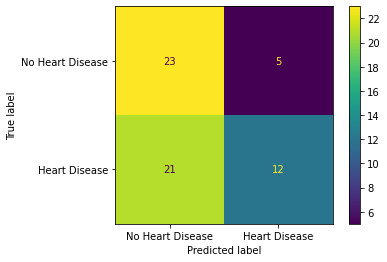

In [13]:
plot_confusion_matrix(vector, x_test, y_test, display_labels=["No Heart Disease", "Heart Disease"])
plt.show()

In [15]:
sensitivity = 12/(12+21)
specificity = 23/(23+5)
print(f"Sensitivity: {sensitivity*100:.0f}%")
print(f"Specificity: {specificity*100:.0f}%")

Sensitivity: 36%
Specificity: 82%


So not very good currently